# Tarea semanal 2
### Alumna: Purpura Salerno, Fiamma
#### Entrega: 9 de mayo del 2022

### Introducción
En el marco de la materia Teoría de los Circuitos 2, a los alumnos se les entrega unos ejercicios para practicar los contenidos aprendidos en clase y reforzar estos mismos. 

#### Ejercicio

La tarea propuesta consiste en el siguiente circuito: 

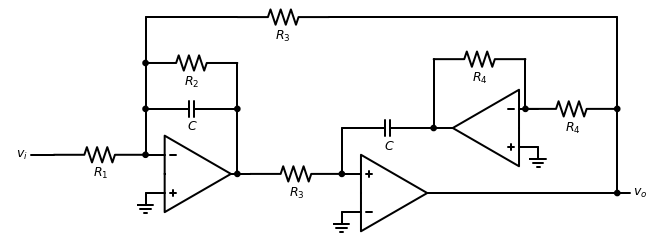

In [102]:
from IPython.display import HTML
from IPython.display import display

tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)

import schemdraw
import schemdraw.elements as elm

with schemdraw.Drawing() as d:
    #INTRODUCIR EL PRIMER OPAMP
    d += (op1 := elm.Opamp(leads=True))
    d += (R1 := elm.Resistor().at(op1.in1).left().idot().label('$R_{1}$', loc='bot'))
    d += elm.Ground().at(op1.in2)
    
    #RAMA DEL CAPACITOR C1
    d += elm.Line().up(d.unit/2).at(op1.in1).dot()
    d += (C1 := elm.Capacitor().right().dot().label('$C$', loc='bot'))
    #RAMA DE LA RESISTENCIA R2
    d += elm.Line().up(d.unit*0.5).at(C1.start).dot()
    d += (R2 := elm.Resistor().right().label('$R_{2}$', loc='bot'))
    d += elm.Line().toy(op1.out).dot()
    #AÑADIR LA RESISTENCIA R3
    d += (R3A := elm.Resistor().right().at(op1.out).dot().label('$R_{3}$', loc='bot'))
    
    #SUMAR EL SEGUNDO OPAMP
    d += (op2 := elm.Opamp(leads=True).flip().anchor('in2'))
    d += elm.Line().at(op2.in2).up(d.unit/2)
    d += (C2 := elm.Capacitor().right().dot().label('$C$', loc='bot'))
    
    #INCORPORAR EL TERCER OPAMP
    d += (op3 := elm.Opamp(leads=True).reverse().anchor('out'))
    d += elm.Line().at(op3.out).up(d.unit*0.75)
    d += (R4A := elm.Resistor().right().label('$R_{4}$' , loc='bot'))
    d += elm.Line().toy(op3.in1).dot()
    d += (R4B := elm.Resistor().right().dot().label('$R_{4}$' , loc='bot'))
    
    #TIERRAS EN LOS OPAMP
    d += elm.Ground().at(op2.in1)
    d += elm.Ground().at(op3.in2)
    
    #RAMA DE LA REALIMENTACION
    d += elm.Line().up(d.unit/2).at(R2.start)
    d += elm.Line().right(d.unit)
    d += (R3B := elm.Resistor().right().label('$R_{3}$', loc='bot'))
    d += elm.Line().tox(R4B.end)
    d += elm.Line().toy(R4B.end)
    d += elm.Line().toy(op2.out).dot()

    # LABELS
    d += elm.Line().left(d.unit/4).at(R1.end).label('$v_{i}$', loc='left')
    d += elm.Line().right(d.unit*2).at(op2.out).label('$v_{o}$', loc='right')


A los alumnos se les pide: 

1. Hallar la transferencia T=Vo/Vi en función de ωo y Q.
2. Obtener el valor de los componentes del circuito de forma tal que ωo=1 y Q=3
3. Ajustar el valor de R1 de forma tal que |T(0)|=20dB

Como tareas extras, se les propone los próximos items: 

4. Obtener los valores de la red normalizados en frecuencia e impedancia.
5. Calcular las sensibilidades  $S^{ωo}_{C}$, $S^{Q}_{R2}$ y $S^{Q}_{R3}$
6. Recalcular los valores de la red para que cumpla con una transferencia Butterworth.
7. Cómo podría obtener un circuito pasabanda con los mismos componentes originales y con qué parámetros quedaría diseñado (Ver ejemplo 4.6 en Schaumann).
8. Simulación circuital de todos los experimentos.

### Punto 1

Para calcular la transferencia, se proponen las siguientes corrientes: 

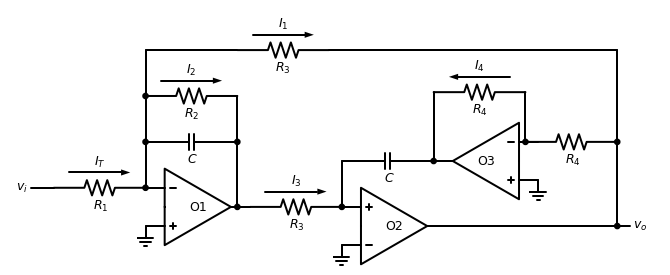

In [115]:

tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)

import schemdraw
import schemdraw.elements as elm

with schemdraw.Drawing() as d:
    #INTRODUCIR EL PRIMER OPAMP
    d += (op1 := elm.Opamp(leads=True).label('O1', loc='center', ofst=0))
    d += (R1 := elm.Resistor().at(op1.in1).left().idot().label('$R_{1}$', loc='bot'))
    d += elm.Ground().at(op1.in2)
    
    #RAMA DEL CAPACITOR C1
    d += elm.Line().up(d.unit/2).at(op1.in1).dot()
    d += (C1 := elm.Capacitor().right().dot().label('$C$', loc='bot'))
    #RAMA DE LA RESISTENCIA R2
    d += elm.Line().up(d.unit*0.5).at(C1.start).dot()
    d += (R2 := elm.Resistor().right().label('$R_{2}$', loc='bot'))
    d += elm.Line().toy(op1.out).dot()
    #AÑADIR LA RESISTENCIA R3
    d += (R3A := elm.Resistor().right().at(op1.out).dot().label('$R_{3}$', loc='bot'))
    
    #SUMAR EL SEGUNDO OPAMP
    d += (op2 := elm.Opamp(leads=True).flip().anchor('in2').label('O2', loc='center', ofst=0))
    d += elm.Line().at(op2.in2).up(d.unit/2)
    d += (C2 := elm.Capacitor().right().dot().label('$C$', loc='bot'))
    
    #INCORPORAR EL TERCER OPAMP
    d += (op3 := elm.Opamp(leads=True).reverse().anchor('out').label('O3', loc='center', ofst=0))
    d += elm.Line().at(op3.out).up(d.unit*0.75)
    d += (R4A := elm.Resistor().right().label('$R_{4}$' , loc='bot'))
    d += elm.Line().toy(op3.in1).dot()
    d += (R4B := elm.Resistor().right().dot().label('$R_{4}$' , loc='bot'))
    
    #TIERRAS EN LOS OPAMP
    d += elm.Ground().at(op2.in1)
    d += elm.Ground().at(op3.in2)
    
    #RAMA DE LA REALIMENTACION
    d += elm.Line().up(d.unit/2).at(R2.start)
    d += elm.Line().right(d.unit)
    d += (R3B := elm.Resistor().right().label('$R_{3}$', loc='bot'))
    d += elm.Line().tox(R4B.end)
    d += elm.Line().toy(R4B.end)
    d += elm.Line().toy(op2.out).dot()

    # LABELS
    d += elm.Line().left(d.unit/4).at(R1.end).label('$v_{i}$', loc='left')
    d += elm.Line().right(d.unit*2).at(op2.out).label('$v_{o}$', loc='right')
    
    d += elm.CurrentLabel(top=True, ofst=.5).at(R1).label('$I_T$')
    d += elm.CurrentLabel(top=True, ofst=.5).at(R3B).label('$I_1$')
    d += elm.CurrentLabel(top=True, ofst=.5).at(R2).label('$I_2$')
    d += elm.CurrentLabel(top=True, ofst=.5).at(R3A).label('$I_3$')
    d += elm.CurrentLabel(top=True, ofst=.5).reverse().at(R4A).label('$I_4$')

Siendo $I_{T}$ la corriente de entrada por el circuito, la cual se divide en $I_{1}$ e $I_{2}$. Esta última es aquella que pasa por el paralelo comprendido entre $R_{2}$ y $C$. Una vez que la corriente $I_{2}$, al llegar al nodo con la salida del primer OPAMP se tiene la corriente $I_{3}$, la cual pasa tanto por la resisencia $R_{3}$ como por $C$. Al encontrarse esta corriente con la salida del tercer OPAMP, por ambas resistencias $R_{4}$ pasa una corriente $I_{4}$, de sentido contrario a $I_{3}$.

Se tiene entonces que $V_{i}$ es: 

(I) $V_{i} = R_{1} * I_{T} =  R_{1} * ( I_{1} + I_{2}) $

A su vez, se tiene que $V_{o}$ es: 

(II) $V_{o} = - R_{4} * I_{4} =  R_{3} * I_{1} $

Se tiene también que el paralelo y la resistencia $R_{3}$ están a la misma tensión, con lo que se tiene: 

$V_{R3} + V_{//} = 0 => V_{R3} = - V_{//} $

(III) $ - R_{3} * I_{3} = Z_{//} * I_{2} $

Siendo: 

$Z_{//} = \frac{1}{Y_{//}} = \frac{1}{Y_{C} + Y_{R2} } = \frac{1}{ s*C + \frac{1}{R2} } = \frac{1}{ \frac{s*C*R2 + 1}{R2} } $

(IV) $Z_{//} = \frac{R2}{s*C*R2 + 1} $

A su vez, se tiene que a la salida del tercer operacional $C$ y $R_{4}$ tienen la misma caida de potencial. Entonces, como se hizo con el paralelo y $R_{3}$: 

$V_{C} + V_{R4} = 0 => V_{C} = - V_{R4} $

(V) $  \frac{1}{s * C} * I_{3} = - R_{4} * ( - I_{4} )$

Teniendo en cuenta la igualdad de (II) y despejando $I_{3}$ de la ecuación (V) se tiene: 

(VI) $ I_{3} = s * C * R_{3} * I_{1} $

Entonces despejando $I_{2}$ de (III) y sustituyendo lo obtenido en la ecuación (VI): 

(VII) $ I_{2} = \frac{s * C * R_{3}^{2}}{Z_{//}} * I_{1} $

Entonces, reemplazando (IV) en (VII):

(VIII) $ I_{2} = \frac{s * C * R_{3}^{2} * (s*C*R2 + R2) }{R2} * I_{1} $

Tomando la última ecuación e incorporandola a la (I):

$V_{i}  =  R_{1} * ( I_{1} + \frac{s * C * R_{3}^{2} * (s*C*R2 + R_{2}) }{R_{2}} * I_{1} ) $

$V_{i}  =  R_{1} *  I_{1} * ( 1 + \frac{s * C * R_{3}^{2} * (s*C*R_{2} + 1) }{R_{2}} ) $

$V_{i}  =  R_{1} *  I_{1} * \frac{R_{2} + s * C * R_{3}^{2} * (s*C*R_{2} + 1)}{R_{2}}$

$V_{i}  =  R_{1} *  I_{1} * \frac{R_{2} + s^{2} * C^{2} * R_{3}^{2} * R_{2} + s * C * R_{3}^{2}}{R_{2}}$

Entonces, se tiene la siguiente transferencia: 

$T(s) = \frac{-R{3} *  I_{1} }{ R_{1} *  I_{1} * \frac{R_{2} + s^{2} * C^{2} * R_{3}^{2} * R_{2} + s * C * R_{3}^{2}}{R_{2}}}$

$T(s) = \frac{- R_{3} * R_{2} }{  R_{1} * (s^{2} * C^{2} * R_{3}^{2} * R_{2} + s * C * R_{3}^{2} + R_{2}) }$

$T(s) = \frac{- R_{3} * R_{2} }{ R_{1}* C^{2} * R_{3}^{2} * R_{2} * ( s^{2} + s * \frac{1}{R_{2}*C} + \frac{1}{C^{2} * R_{3}^{2}}) }$

(IX) $T(s) = \frac{- \frac{1}{C^{2}*R_{3}*R{1}} }{s^{2} + s * \frac{1}{R_{2}*C} + \frac{1}{C^{2} * R_{3}^{2}}}$

Con lo que queda: 

$ \omega_{o}^{2} =  \frac{1}{C^{2} * R_{3}^{2}} => \omega_{o} =  \frac{1}{C * R_{3}} $

$ H * \omega_{o}^{2} = - \frac{1}{C^{2}*R_{3}*R{1}} => H = - \frac{R_{3}}{R{1}} $

$ \frac{\omega_{o}}{Q} = \frac{1}{R_{2}*C} = \frac{1}{C * R_{3}} * \frac{1}{Q} => Q = \frac{R_{2}}{R_{3}} $

Con lo cual tenemos los parámetros de la ecuación: 

$T(s) = \frac{H * \omega_{o}}{s^{2}+ s * \frac{\omega_{o}}{Q}+\omega_{o}^{2} }$

### Punto 2

Si $ \omega_{o}$ = 1 entonces: 

$\frac{1}{C * R_{3}} = 1 => \frac{1}{C} = R_{3} $

Con Q = 3, se tiene que: 

$ Q = \frac{R_{2}}{R_{3}} = 3 => R_{2} = 3 * R_{3} = 3 * \frac{1}{C} $

### Punto 3

Se tiene que todo modulo de una transferencia de un pasa bajos corresponde a: 

$|T(\omega)| = \frac{ H * \omega_{o}^{2} }{ \sqrt{ (\omega_{o}^2-\omega^2)^{2} + (\frac{\omega * \omega_{o})^{2} }{Q})^2 }}$

Entonces...

$ |T(\omega = 0 )| = \frac{H * \omega_{o}^{2}}{\sqrt{ (\omega_{o}^2)^{2} }} = H  $

Por lo cual, se tiene que: 

$ |T(\omega = 0 )|_{dB} = 20 * log (|T(\omega = 0 )|) = 20 * log (H) $

$ log (H) = 1 => H = 10 $

Entonces, se tiene que si H tiene que ser igual a 10, se tiene que cumplir la condición: 

$ R_{3} = 10 * R_{1} $

De tal manera, si se tendría que cumplir también la condición del item anterior, se tendría que cumplir: 

$ R_{2} = 30 * R_{1} $